## University of Antananarivo

## kidney_prediction_project

by  
## RANDRIAMAMONJY Tokiniaina (M1:MAFI/FONDA)


# Step-1: Import the Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Pour un affichage plus joli
sns.set(style="whitegrid")
%matplotlib inline

# Step-2: Load the Dataset:<br>
The dataset contains medical information about patients and aims to predict whether a patient has chronic kidney disease (CKD).<br>
Data contains:<br>

age: Age of the patient (years)<br>
bp: Blood pressure (mm/Hg)<br>
sg: Specific gravity<br>
al: Albumin<br>
su: Sugar<br>
rbc: Red blood cells (normal/abnormal)<br>
pc: Pus cell (normal/abnormal)<br>
pcc: Pus cell clumps (present/notpresent)<br>
ba: Bacteria (present/notpresent)<br>
bgr: Blood glucose random<br>
bu: Blood urea<br>
sc: Serum creatinine<br>
sod: Sodium<br>
pot: Potassium<br>
hemo: Hemoglobin<br>
pcv: Packed cell volume<br>
wc: White blood cell count<br>
rc: Red blood cell count<br>
htn: Hypertension (yes/no)<br>
dm: Diabetes mellitus (yes/no)<br>
cad: Coronary artery disease (yes/no)<br>
appet: Appetite (good/poor)<br>
pe: Pedal edema (yes/no)<br>
ane: Anemia (yes/no)<br>
classification: Target - ckd (has disease) / notckd (healthy)<br>

In [5]:
# Chargement du dataset
df = pd.read_csv('kidney_disease.csv')

# Aperçu
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Step-3: Data Analysis on Kidney Disease Dataset :
This step involves getting familiar with the shape, dtypes, duplicates, and other characteristics of the dataset.<br>
The main things we check<br>

Head and Tail<br>
Shape<br>
Info and dtypes<br>
Duplicates<br>
Missing values<br>
Statistical summary (added for better analysis: mean, median, std, etc.)

In [6]:
# First 5 rows
print("First 5 rows:")
df.head()

First 5 rows:


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
# Last 5 rows
print("Last 5 rows:")
df.tail()

Last 5 rows:


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [8]:
# Shape of the dataset
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
df.shape

Dataset has 400 rows and 26 columns.


(400, 26)

In [9]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [10]:
# Check for duplicates
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


In [11]:
# Missing values
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [12]:
# Added: Statistical summary for numerical columns (mean, median, std, etc.)
print("Statistical summary of numerical columns:")
df.describe()

Statistical summary of numerical columns:


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Step-4: Data Preparation:
We need to:<br>

Drop the 'id' column if it exists (to avoid KeyError)<br>
Clean categorical columns: strip spaces and remove tabs (e.g., '\tyes' or ' yes')<br>
Fix classification column (some entries have '\t')<br>
Convert pcv, wc, rc to numeric (they are stored as object)<br>
Handle missing values efficiently<br>

In [13]:
# Drop id column if it exists (to avoid KeyError)
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# Clean categorical columns: strip spaces and remove tabs, but handle NaN properly
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
for col in categorical_cols:
    if col in df.columns:
        # Apply cleaning only to non-NaN values to avoid 'nan' string
        mask = df[col].notna()
        df.loc[mask, col] = df.loc[mask, col].astype(str).str.strip().str.replace('\t', '').str.replace(' ', '')

# Fix specific issues (e.g., empty strings or inconsistencies)
df['dm'] = df['dm'].replace({'yes': 'yes', 'no': 'no', '': np.nan})  # Treat empty as NaN
df['cad'] = df['cad'].replace({'no': 'no', '': np.nan})

# Convert pcv, wc, rc to numeric
cols_to_numeric = ['pcv', 'wc', 'rc']
for col in cols_to_numeric:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Check target distribution
print("Target distribution:")
print(df['classification'].value_counts())

Target distribution:
classification
ckd       250
notckd    150
Name: count, dtype: int64


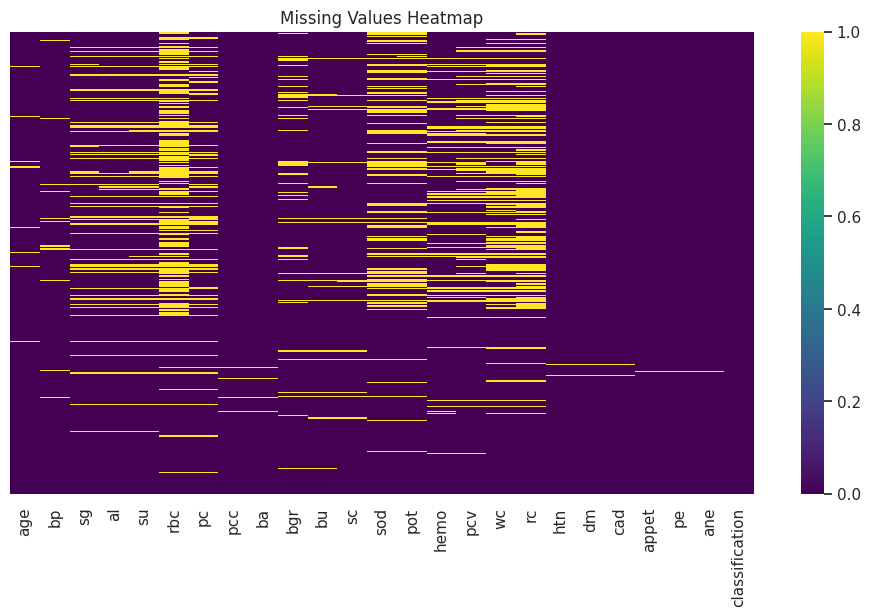

In [14]:
# Visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [15]:
# Percentage of missing values
print("Percentage of missing values:")
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Percentage of missing values:


rbc               38.00
rc                32.75
wc                26.50
pot               22.00
sod               21.75
pcv               17.75
pc                16.25
hemo              13.00
su                12.25
sg                11.75
al                11.50
bgr               11.00
bu                 4.75
sc                 4.25
bp                 3.00
age                2.25
ba                 1.00
pcc                1.00
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

# Step-5: Handling Missing Values and Data Cleaning<br>
Before imputation, analyze distributions to justify choices (e.g., median for skewed data).<br>
Many columns have missing values. We will impute:<br>

Numerical columns → median (robust to outliers, justified by histograms)<br>
Categorical columns → mode (most frequent value)<br>

Added: Post-imputation validation (check stats before/after).<br>

In [16]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.drop('classification').tolist()

# Before imputation stats
print("Before imputation - Numerical stats:")
print(df[numerical_cols].describe())

# Impute numerical with median (vectorized for efficiency)
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Impute categorical with mode (efficient loop)
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# After imputation stats (validation)
print("\nAfter imputation - Numerical stats:")
print(df[numerical_cols].describe())

# Check again
print("Missing values after imputation: ", df.isnull().sum().sum())

Before imputation - Numerical stats:
              age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  381.000000  383.000000  313.000000  312.000000  348.000000  329.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.526437   38.

# Step-6: Exploratory Data Analysis (EDA)
Now let's visualize the data to understand relationships and distributions. We focus on key features for efficiency.<br>
Added: Correlation matrix before modeling (as suggested).<br>

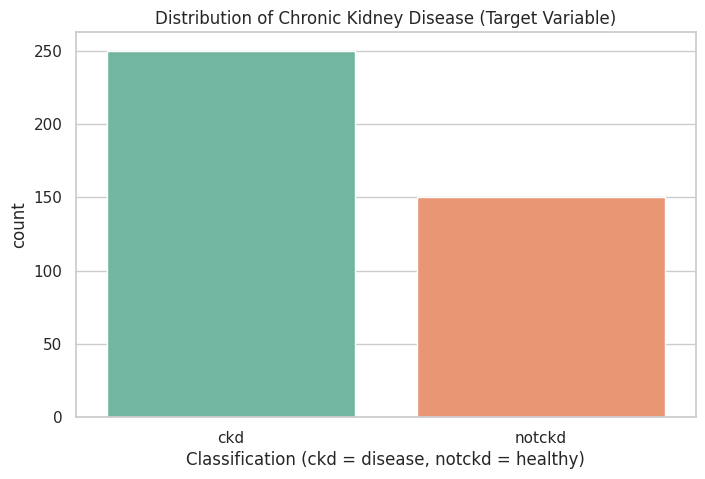

classification
ckd       62.5
notckd    37.5
Name: proportion, dtype: float64


In [17]:
# Target variable distribution
plt.figure(figsize=(8,5))
sns.countplot(x='classification', data=df, palette='Set2')
plt.title('Distribution of Chronic Kidney Disease (Target Variable)')
plt.xlabel('Classification (ckd = disease, notckd = healthy)')
plt.show()

print(df['classification'].value_counts(normalize=True) * 100)

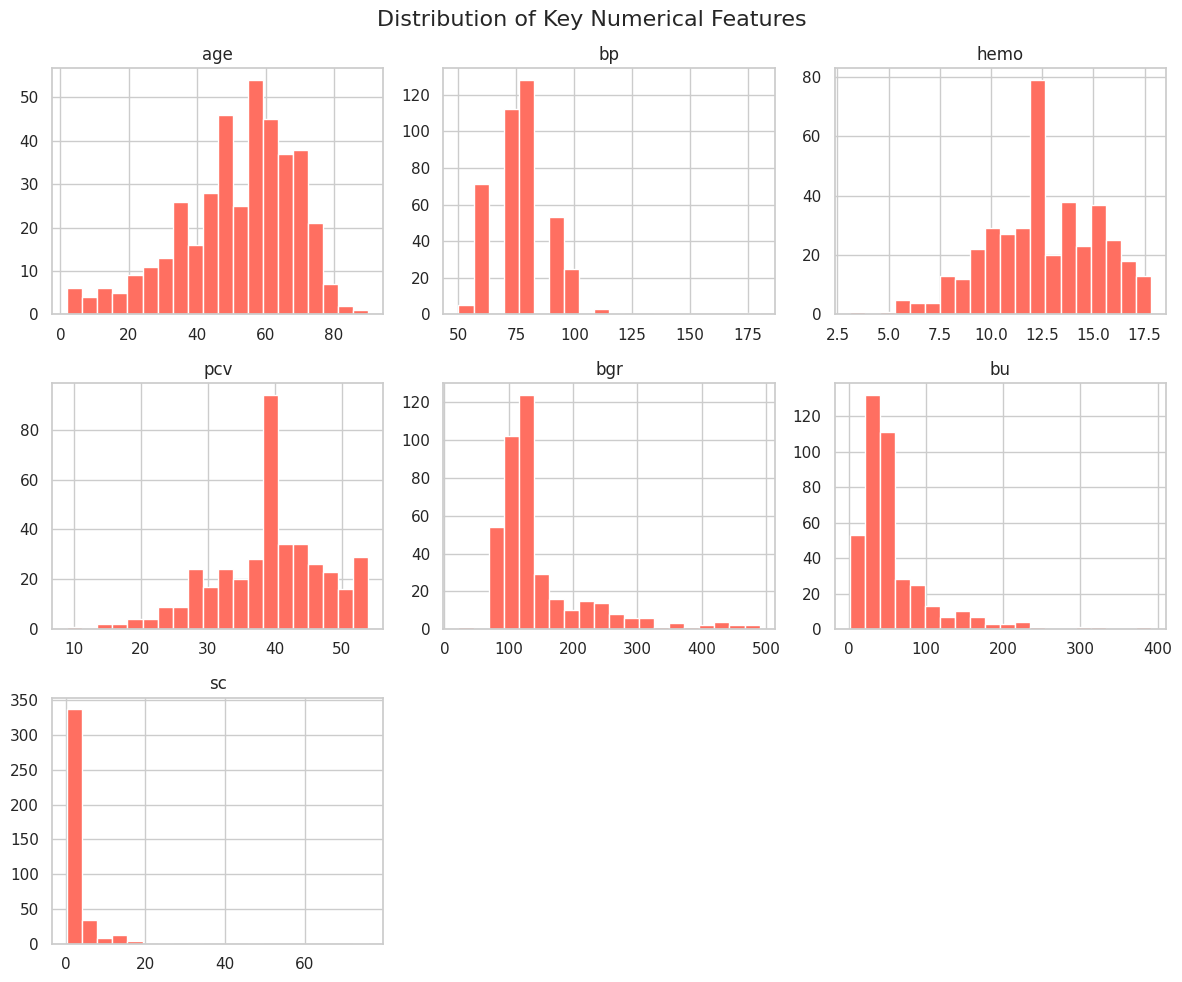

In [18]:
# Histograms for key numerical features (efficient selection)
key_numerical = ['age', 'bp', 'hemo', 'pcv', 'bgr', 'bu', 'sc']
df[key_numerical].hist(figsize=(12,10), bins=20, color='#FF6F61')
plt.suptitle('Distribution of Key Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

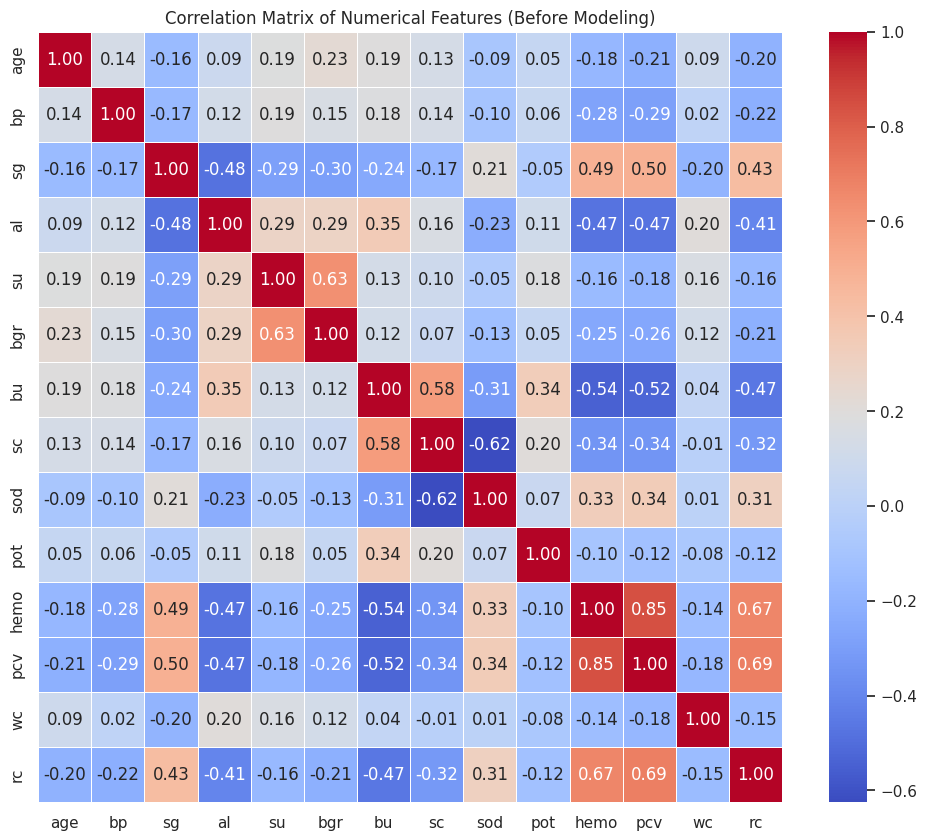

In [28]:
# Added: Correlation matrix before modeling
plt.figure(figsize=(12,10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features (Before Modeling)')
plt.show()

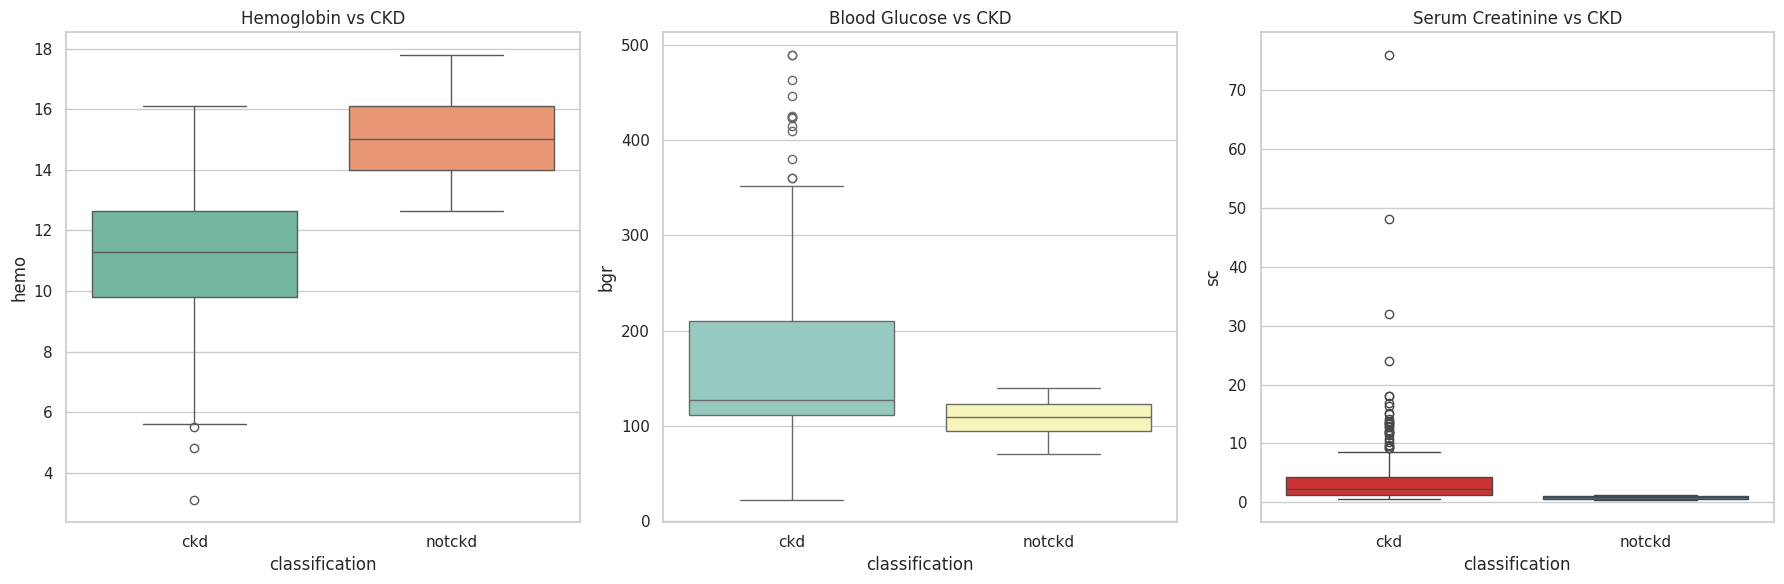

In [29]:
# Key boxplots (efficient selection)
fig, axes = plt.subplots(1, 3, figsize=(18,6))
sns.boxplot(x='classification', y='hemo', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Hemoglobin vs CKD')

sns.boxplot(x='classification', y='bgr', data=df, palette='Set3', ax=axes[1])
axes[1].set_title('Blood Glucose vs CKD')

sns.boxplot(x='classification', y='sc', data=df, palette='Set1', ax=axes[2])
axes[2].set_title('Serum Creatinine vs CKD')

plt.tight_layout()
plt.show()

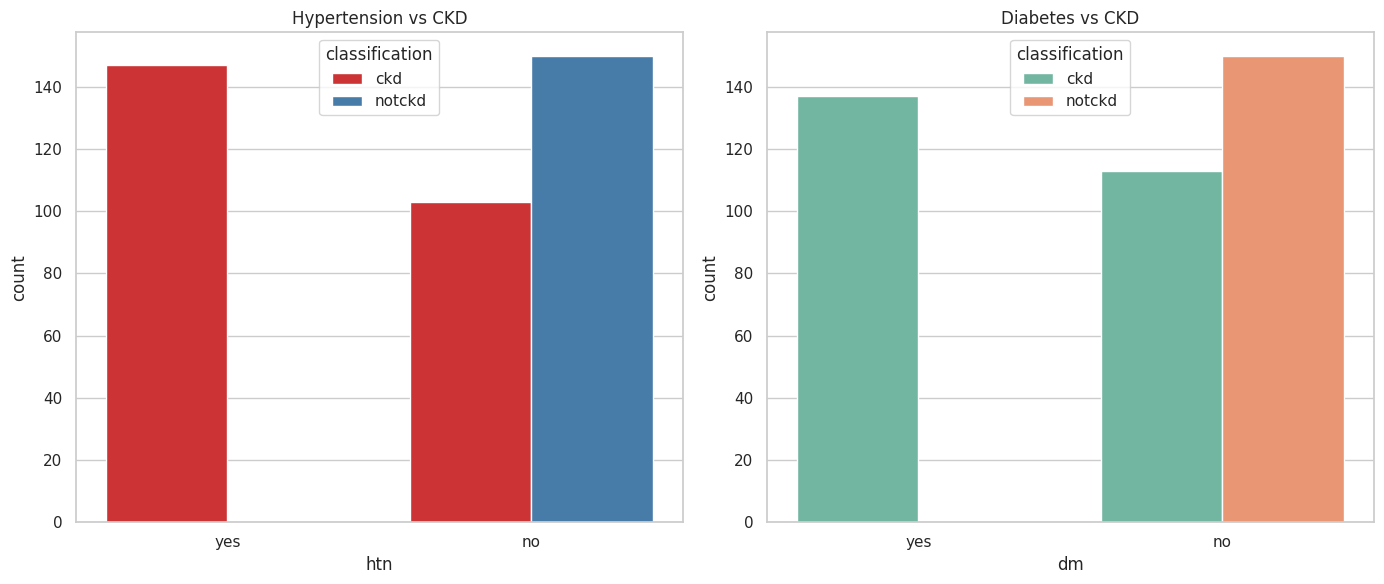

In [30]:
# Categorical vs Target (efficient with 2 key ones)
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.countplot(x='htn', hue='classification', data=df, ax=axes[0], palette='Set1')
axes[0].set_title('Hypertension vs CKD')

sns.countplot(x='dm', hue='classification', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Diabetes vs CKD')

plt.tight_layout()
plt.show()

# Step-7: Feature Encoding and Final Preparation
Encode categorical variables efficiently using LabelEncoder.<br>
To avoid data leakage, we split the data first, then fit encoders and scaler on train set only.<br>

In [31]:
# Features and target
X = df.drop('classification', axis=1)
y = df['classification'].map({'ckd': 1, 'notckd': 0})  # Encode target early

# Split (stratified for balance)
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train_raw.shape[0]} samples")
print(f"Test set: {X_test_raw.shape[0]} samples")

Training set: 320 samples
Test set: 80 samples


In [32]:
# Now encode and scale AFTER split to avoid leakage

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Categorical columns (excluding target)
cat_cols = X.select_dtypes(include='object').columns

# Fit encoders on train, transform both
label_encoders = {}
X_train = X_train_raw.copy()
X_test = X_test_raw.copy()

for col in cat_cols:
    le = LabelEncoder()
    # Handle NaN by filling with 'missing' before encoding
    X_train[col] = X_train_raw[col].fillna('missing')
    X_test[col] = X_test_raw[col].fillna('missing')
    # Fit on unique non-missing values from train
    train_unique = X_train[col].unique()
    le.fit(train_unique)
    X_train[col] = le.transform(X_train[col])
    # For test: map unknown to 'missing' if not in classes
    X_test[col] = X_test[col].apply(lambda x: x if x in le.classes_ else 'missing')
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# Numerical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Scale: fit on train, transform both (normalization/standardization as suggested)
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train_raw[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test_raw[numerical_cols])

# Final check (validation post-processing)
print("Post-encoding sample (train):")
X_train.head()

Post-encoding sample (train):


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
108,-0.365398,0.224371,-0.508859,-0.678342,-0.347672,1,0,0,0,-0.492205,...,-0.266707,-0.235403,0.717975,-0.650709,0,0,0,0,0,0
210,0.461779,1.660345,-0.508859,2.411616,1.712604,1,1,0,0,1.577476,...,-1.896490,-2.324464,0.566996,-1.009720,1,1,1,0,0,1
137,-0.365398,-1.211603,-1.444691,0.866637,-0.347672,1,0,1,0,1.759272,...,-0.918620,-1.218491,0.340528,0.067315,1,1,0,0,0,0
148,1.052620,-1.211603,0.426974,-0.678342,-0.347672,1,1,0,0,0.402792,...,0.041141,0.133254,-0.112408,0.067315,1,0,0,1,0,0
246,-0.188146,2.378332,-0.508859,1.639126,-0.347672,0,1,1,0,-0.506189,...,-1.425664,-1.587148,-1.244749,-2.685108,1,0,1,0,0,1


# Step-8: Modeling - Comparison of 8 Different Models
We train 8 models efficiently and compare using key metrics.<br>
To handle class imbalance (62.5% ckd vs 37.5% notckd), we use class_weight='balanced' where applicable.<br>
For robustness, we use cross-validation (5-fold) on the training set to evaluate models.<br>

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define 8 models (with class_weight where possible for imbalance)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=200),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), eval_metric='logloss', random_state=42, n_jobs=-1),
    'SVM': SVC(class_weight='balanced', probability=True),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in models.items():
    # Cross-validation on train set (5-fold, using AUC for robustness)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
    mean_cv_auc = cv_scores.mean()
    
    # Fit on full train and evaluate on test
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred
    
    results.append({
        'Model': name,
        'CV AUC (Train)': mean_cv_auc,
        'Accuracy (Test)': accuracy_score(y_test, y_pred),
        'Precision (Test)': precision_score(y_test, y_pred),
        'Recall (Test)': recall_score(y_test, y_pred),
        'F1-Score (Test)': f1_score(y_test, y_pred),
        'AUC (Test)': roc_auc_score(y_test, y_prob)
    })

# Results table (sorted by Test AUC)
results_df = pd.DataFrame(results).sort_values('AUC (Test)', ascending=False).reset_index(drop=True)
results_df

,Model,CV AUC (Train),Accuracy (Test),Precision (Test),Recall (Test),F1-Score (Test),AUC (Test)
0,Logistic Regression,1.000000,0.9750,1.0,0.96,0.979592,1.000000
1,Random Forest,0.999792,1.0000,1.0,1.00,1.000000,1.000000
2,SVM,1.000000,0.9875,1.0,0.98,0.989899,1.000000
3,Naive Bayes,1.000000,0.9750,1.0,0.96,0.979592,1.000000
4,Gradient Boosting,0.999792,1.0000,1.0,1.00,1.000000,1.000000
5,XGBoost,0.998542,0.9875,1.0,0.98,0.989899,0.999333
6,KNN,0.991875,0.9625,1.0,0.94,0.969072,0.999333
7,Decision Tree,0.973333,0.9625,1.0,0.94,0.969072,0.970000


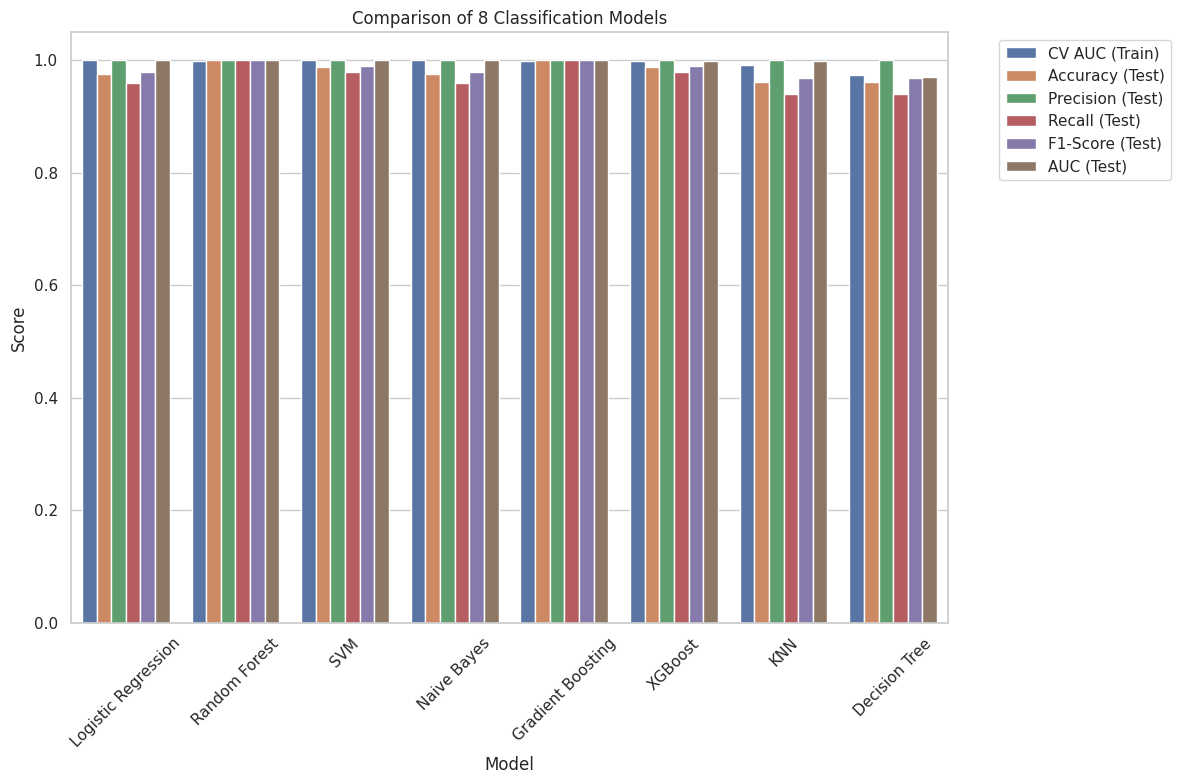

In [34]:
# Bar plot comparison (efficient visualization)
plt.figure(figsize=(12,8))
results_df_melted = results_df.melt('Model', var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=results_df_melted)
plt.title('Comparison of 8 Classification Models')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()